In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

C:\Users\User\AppData\Local\Temp\ipykernel_29912\1749489565.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([x[3, 0], x[3, 0] + d[4] * np.cos(np.sum(phi))], [x[3, 1], x[3, 1] + d[4] * np.sin(np.sum(phi))], 'co-')  # Pole 5


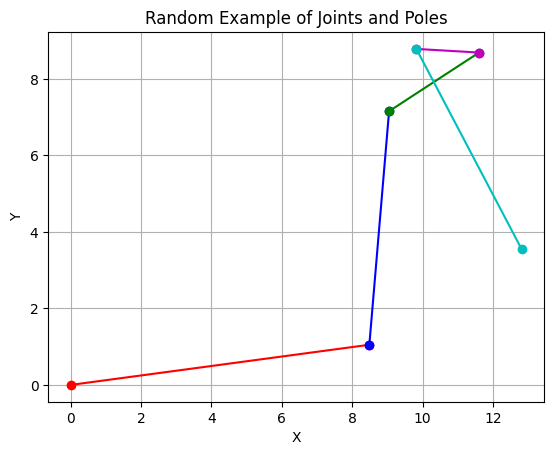

In [3]:

def visualize_random_example(df):
    # Select a random example from the DataFrame
    random_example = df.sample(1).iloc[0]
    
    # Extract joint positions
    x = np.array([random_example[f'x{i+1}_{j+1}'] for i in range(4) for j in range(2)]).reshape(4, 2)
    
    # Extract lengths and angles
    d = random_example[['d1', 'd2', 'd3', 'd4', 'd5']]
    phi = random_example[['phi1', 'phi2', 'phi3', 'phi4']]
    
    # Plot the joints and poles
    fig, ax = plt.subplots()
    ax.plot([0, x[0, 0]], [0, x[0, 1]], 'ro-')  # Pole 1
    ax.plot([x[0, 0], x[1, 0]], [x[0, 1], x[1, 1]], 'bo-')  # Pole 2
    ax.plot([x[1, 0], x[2, 0]], [x[1, 1], x[2, 1]], 'go-')  # Pole 3
    ax.plot([x[2, 0], x[3, 0]], [x[2, 1], x[3, 1]], 'mo-')  # Pole 4
    ax.plot([x[3, 0], x[3, 0] + d[4] * np.cos(np.sum(phi))], [x[3, 1], x[3, 1] + d[4] * np.sin(np.sum(phi))], 'co-')  # Pole 5
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Random Example of Joints and Poles')
    plt.grid(True)
    
    
    plt.show()

#load data
df = pd.read_csv('toy_dataset.csv')



# Visualize a random example
visualize_random_example(df)

In [4]:
from models.autoencoder import Autoencoder
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

model = Autoencoder()
model.load_state_dict(torch.load('models/autoencoder.pth'))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
)

In [5]:
def generate_data(num_samples=1000):
    data = []

    d =   [1,1,1,1,1] # Lengths d1, d2, d3, d4, d5
   
    phi = np.random.uniform(0, 2*np.pi, size=4)  # Angles phi1, phi2, phi3, phi4
    x = np.zeros((4, 2))  # Assume 2D for simplicity
    x[0] = [d[0] * np.cos(phi[0]), d[0] * np.sin(phi[0])]
    x[1] = x[0] + [d[1] * np.cos(phi[1]), d[1] * np.sin(phi[1])]
    x[2] = x[1] + [d[2] * np.cos(phi[2]), d[2] * np.sin(phi[2])]
    x[3] = x[2] + [d[3] * np.cos(phi[3]), d[3] * np.sin(phi[3])]

    return x

# Generate a single input sample
data = generate_data(num_samples=1)
input_point = data.reshape(-1)

In [6]:
input_point

array([-0.6540605 , -0.75644224, -0.43714651, -1.73263295, -1.17671096,
       -2.4057187 , -0.19063236, -2.23943882])

In [7]:
input_tensor = torch.tensor(input_point, dtype=torch.float32).unsqueeze(0)

In [8]:
encoded = model.encoder(input_tensor).detach().numpy()


In [9]:
encoded

array([[ -0.5341036 ,  -1.8341317 ,  -4.2545547 , -16.915289  ,
          0.9189557 ,  -1.2162426 ,  -7.839594  ,  -0.9037267 ,
          3.3526382 ,  -2.956278  ,  -0.25717723,  -2.7809079 ,
          0.18732817,  -2.9245481 ,   2.1391444 ,  -0.2274643 ]],
      dtype=float32)

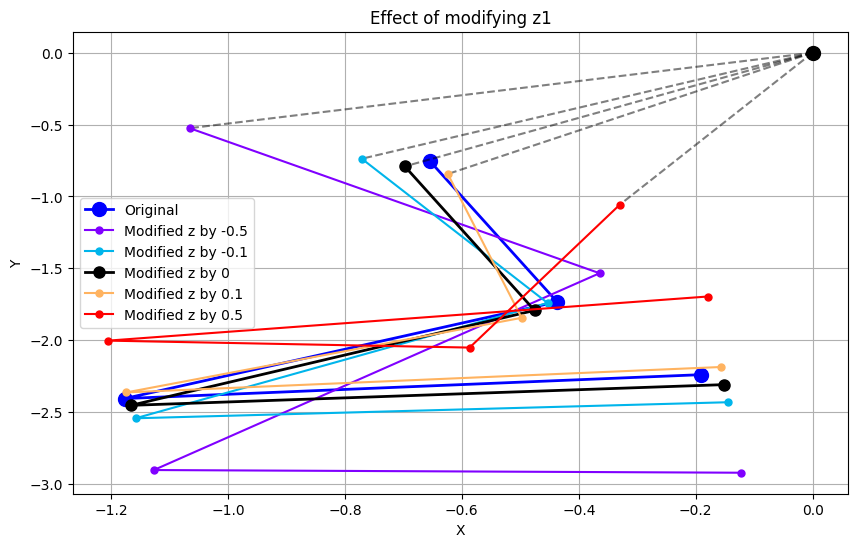

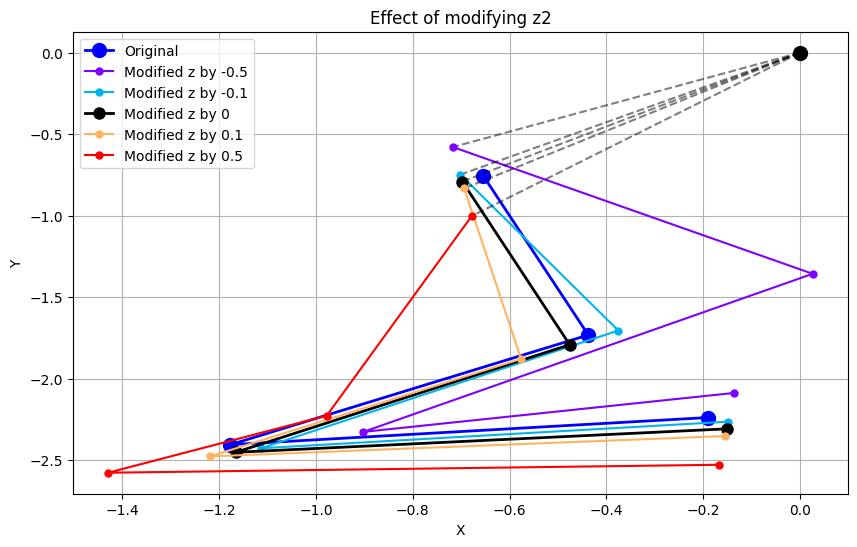

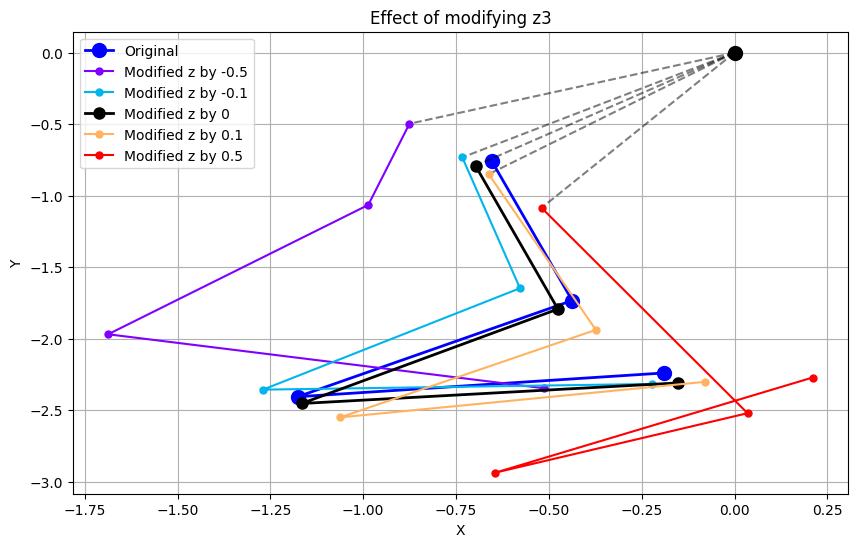

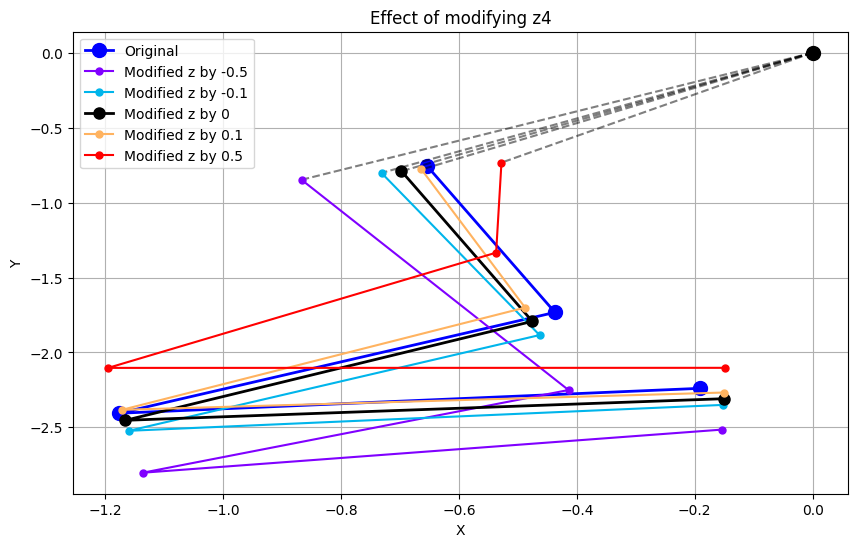

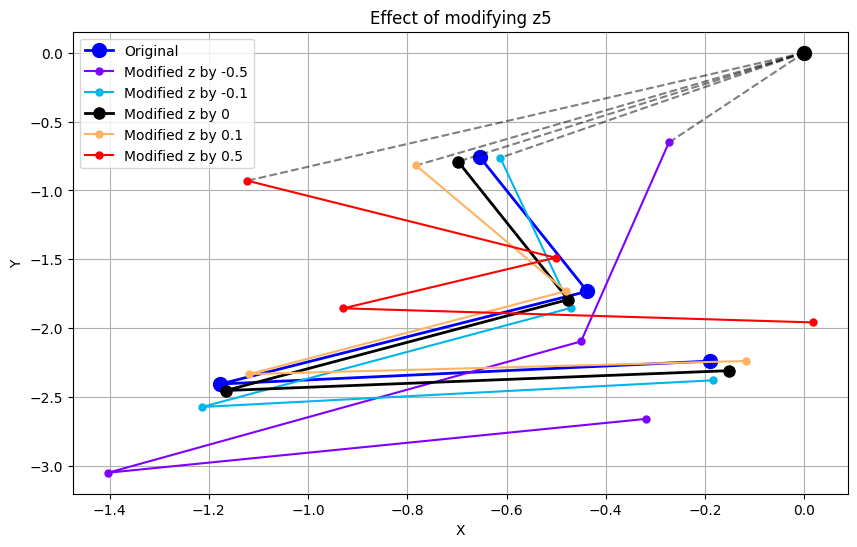

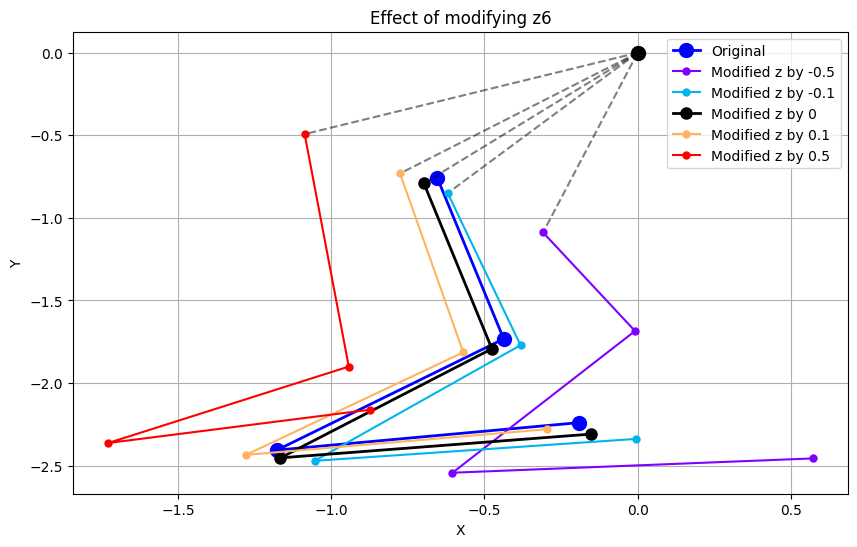

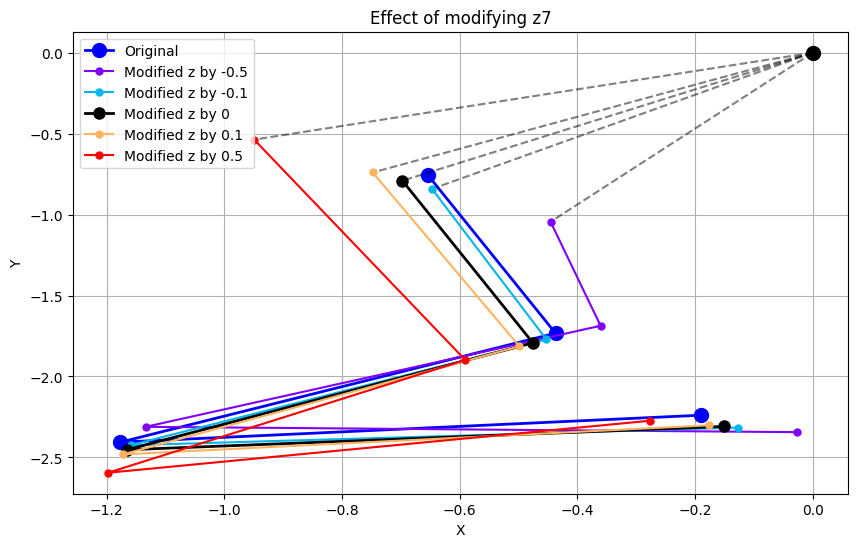

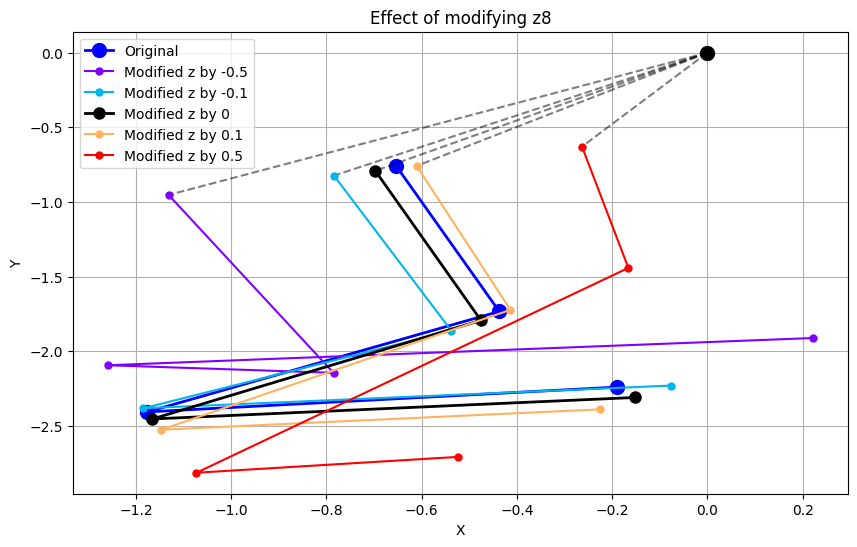

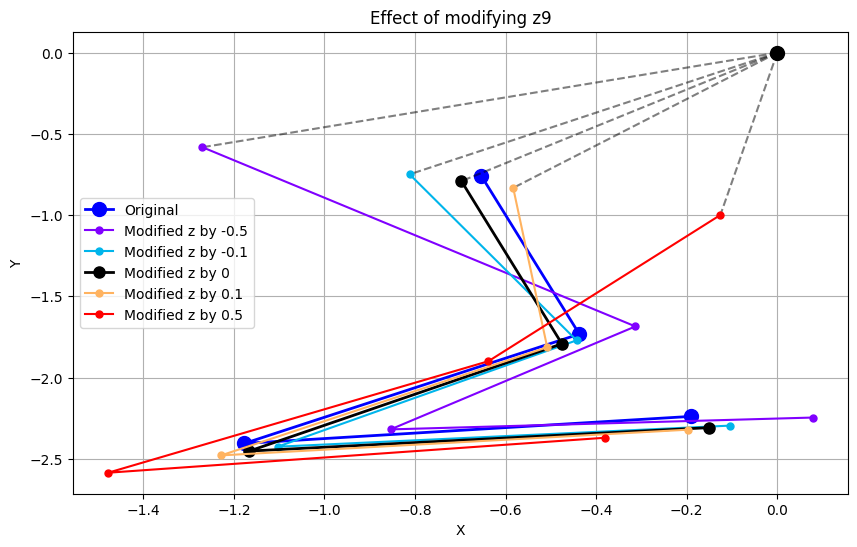

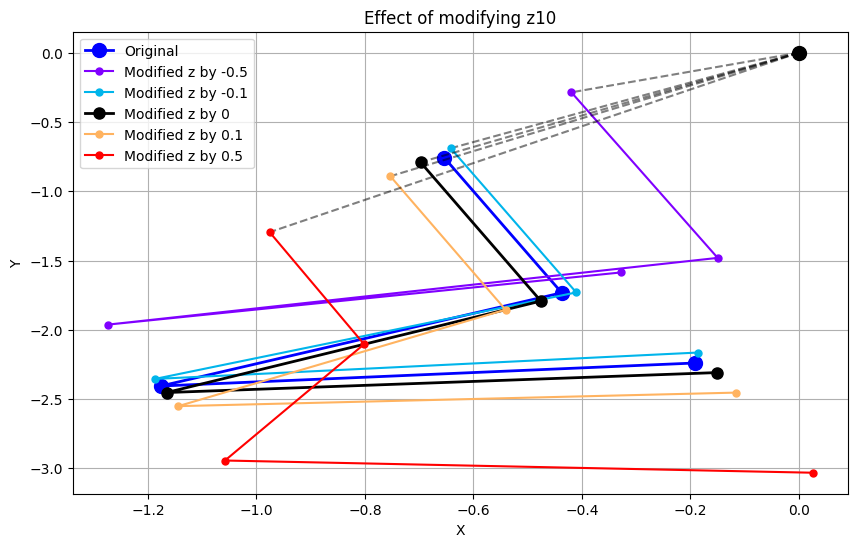

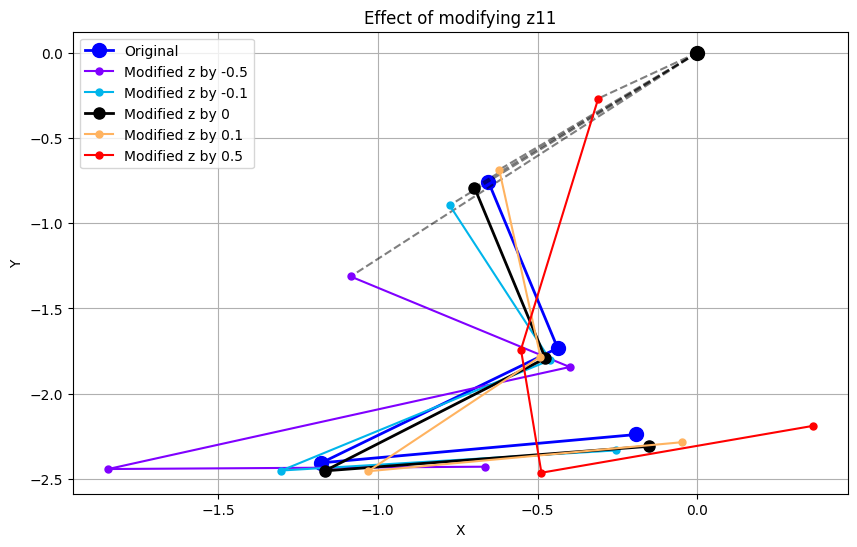

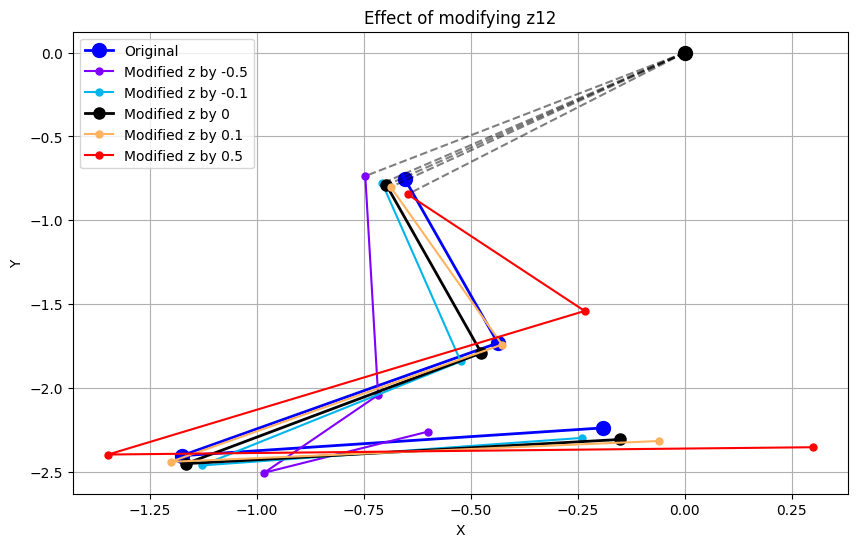

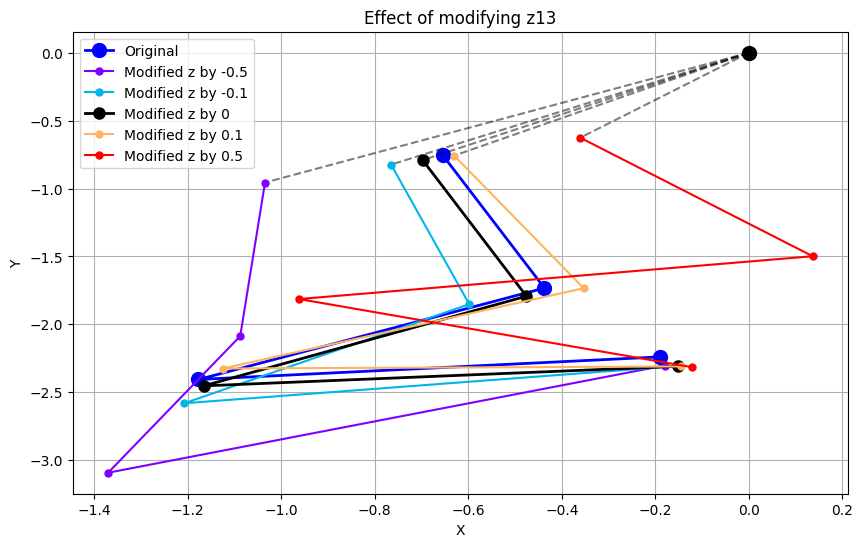

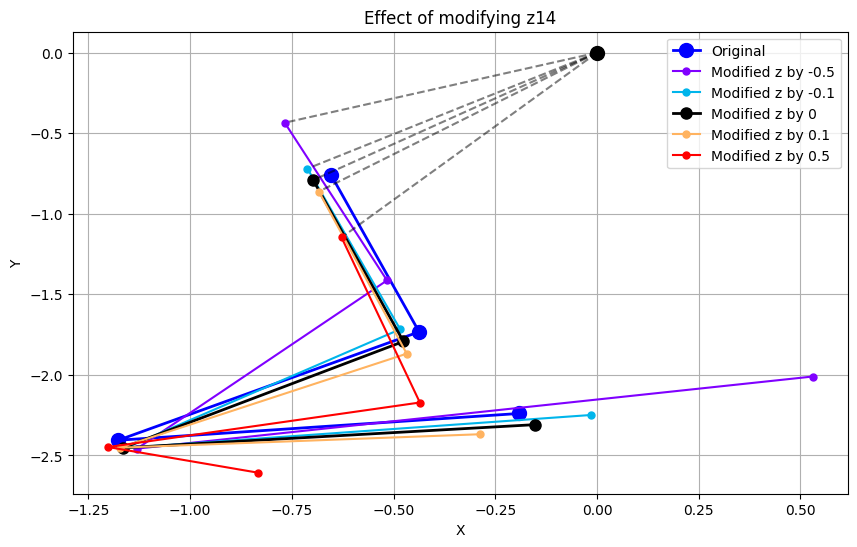

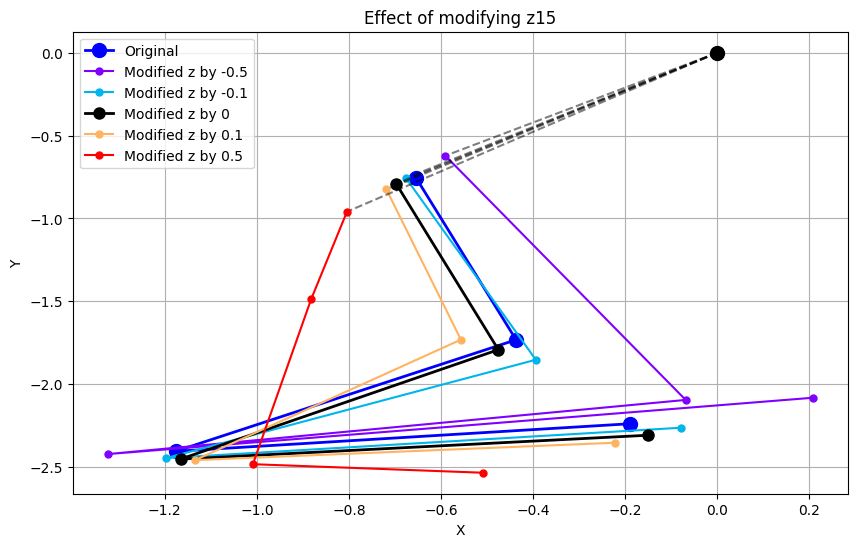

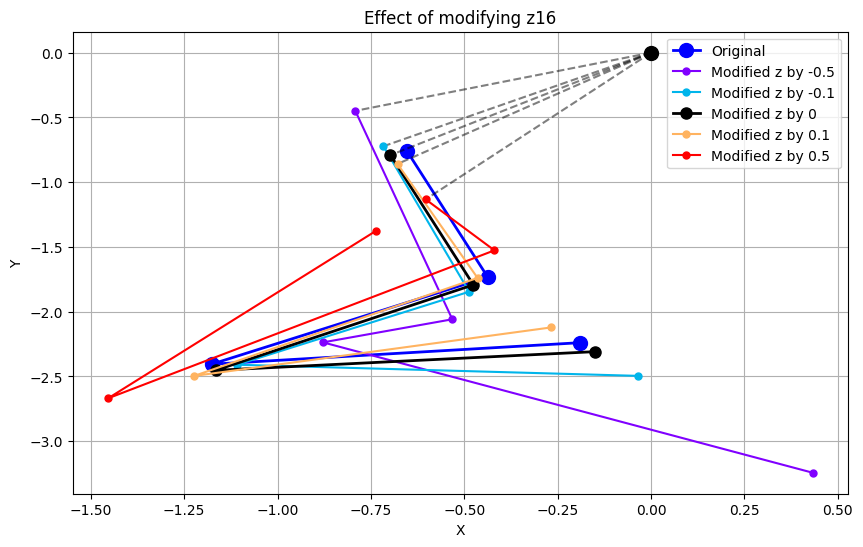

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Plot function
def plot_points(original, modified_points, values_to_add, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting the original points with bold blue line
    plt.plot(original[::2], original[1::2], 'bo-', label='Original', markersize=10, linewidth=2)
    
    # Starting point (0,0)
    plt.plot(0, 0, 'ko', markersize=10)  # Plots the point (0,0)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(modified_points)))
    for i, points in enumerate(modified_points):
        # Connect (0,0) to the first point of each set of modified points
        plt.plot([0, points[0]], [0, points[1]], 'k--', alpha=0.5)  # Dashed line to first point of each reconstruction
        
        # Adjust style based on whether the modification is zero
        if values_to_add[i] == 0.0:
            plt.plot(points[::2], points[1::2], 'o-', color='black', label='Modified z by 0', markersize=8, linewidth=2)
        else:
            plt.plot(points[::2], points[1::2], 'o-', color=colors[i], label=f'Modified z by {values_to_add[i]}', markersize=5)
    
    plt.legend()
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Example usage
# Assuming 'encoded' is a previously defined tensor with shape [1, z_dim] and 'input_point' is an array of coordinates
values_to_add = [-0.5, -0.1, 0.0, 0.1, 0.5]
for i in range(encoded.shape[1]):
    modified_points = []
    for val in values_to_add:
        modified_encoded = encoded.copy()
        modified_encoded[0, i] += val  # Change the latent variable
        modified_tensor = torch.tensor(modified_encoded, dtype=torch.float32)
        decoded = model.decoder(modified_tensor).detach().numpy()
        modified_points.append(decoded.flatten())
    plot_points(input_point, modified_points, values_to_add, f"Effect of modifying z{i+1}")

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import torch

def create_interactive_plot(encoded, model, input_point):
    # Create the figure with subplots
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("Original", "Reconstruction"),
                        specs=[[{"type": "scatter"}, {"type": "scatter"}]])

    # Plot original points
    fig.add_trace(
        go.Scatter(x=[0] + list(input_point[::2]), y=[0] + list(input_point[1::2]), 
                   mode='lines+markers', name='Original', 
                   line=dict(color='blue', width=2), 
                   marker=dict(size=10)),
        row=1, col=1
    )

    # Initial reconstruction
    decoded = model.decoder(torch.tensor(encoded, dtype=torch.float32)).detach().numpy().flatten()
    
    # Plot initial reconstruction
    reconstruction_trace = go.Scatter(
        x=[0] + list(decoded[::2]), y=[0] + list(decoded[1::2]),
        mode='lines+markers', name='Reconstruction',
        line=dict(color='red', width=2),
        marker=dict(size=10)
    )
    fig.add_trace(reconstruction_trace, row=1, col=2)

    # Add slider for choosing zi
    steps = []
    for i in range(encoded.shape[1]):
        step = dict(
            method="update",
            args=[{"visible": [True] * (encoded.shape[1] + 1)},
                  {"title": f"Effect of modifying z{i+1}"}],
            label=f"z{i+1}"
        )
        steps.append(step)

    sliders = [dict(
        active=0,
        currentvalue={"prefix": "Modifying: "},
        pad={"t": 50},
        steps=steps
    )]

    # Add slider for modifying the chosen zi
    fig.update_layout(
        sliders=sliders,
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[dict(
                label='Reset',
                method='update',
                args=[{'y': [decoded]}]
            )]
        )]
    )

    # Update function for zi modification
    def update_zi(zi, value):
        modified_encoded = encoded.copy()
        modified_encoded[0, zi] += value
        decoded = model.decoder(torch.tensor(modified_encoded, dtype=torch.float32)).detach().numpy().flatten()
        with fig.batch_update():
            fig.data[1].x = [0] + list(decoded[::2])
            fig.data[1].y = [0] + list(decoded[1::2])

    # Add slider for modifying zi value
    fig.update_layout(
        sliders=[
            dict(
                active=0,
                currentvalue={"prefix": "zi value: "},
                pad={"t": 100},
                steps=[dict(
                    args=[dict(y=[[0] + list(model.decoder(torch.tensor(encoded, dtype=torch.float32)).detach().numpy().flatten()[1::2])])],
                    method="update",
                    label=str(i/10)
                ) for i in range(-10, 11)],
                len=0.9,
                x=0.1,
                y=0,
            )
        ]
    )

    # Update layout
    fig.update_layout(height=600, width=1200, title_text="Interactive Latent Space Exploration")
    fig.update_xaxes(title_text="X", row=1, col=1)
    fig.update_yaxes(title_text="Y", row=1, col=1)
    fig.update_xaxes(title_text="X", row=1, col=2)
    fig.update_yaxes(title_text="Y", row=1, col=2)

    return fig

# Example usage
# Assuming 'encoded', 'model', and 'input_point' are already defined
fig = create_interactive_plot(encoded, model, input_point)
fig.show()


NameError: name 'encoded' is not defined

In [33]:

encoded = model.encoder(input_tensor)
decoded_points= model.decoder(encoded).detach().numpy()

In [34]:
decoded_points

array([[ 0.9274551 ,  0.19366011,  1.9143482 , -0.06271583,  1.8809922 ,
        -1.0694901 ,  0.9574135 , -1.410801  ]], dtype=float32)

In [38]:
decoded_points.squeeze().shape

(8,)

In [39]:
import numpy as np

# List of 8 values representing the coordinates x11, x12, x21, x22, x31, x32, x41, x42
decoded_points= model.decoder(encoded).squeeze().detach().numpy()

# Convert the list into numpy arrays for the points
x1 = np.array(decoded_points[0:2])
x2 = np.array(decoded_points[2:4])
x3 = np.array(decoded_points[4:6])
x4 = np.array(decoded_points[6:8])

# Function to calculate the angle between two vectors
def angle_between(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    angle_radians = np.arccos(dot_product / (magnitude_v1 * magnitude_v2))
    angle_degrees = np.degrees(angle_radians)
    return angle_degrees

# Calculate vectors from points
v1 = x1 - np.array([0, 0])  # From origin to x1
v2 = x2 - x1               # From x1 to x2
v3 = x3 - x2               # From x2 to x3
v4 = x4 - x3               # From x3 to x4

# Calculate angles between vectors
angle1 = angle_between(v1, v2)
angle2 = angle_between(v2, v3)
angle3 = angle_between(v3, v4)

# Print angles
print("Angle between (0,0)-x1 and x1-x2: {:.2f} degrees".format(angle1))
print("Angle between x1-x2 and x2-x3: {:.2f} degrees".format(angle2))
print("Angle between x2-x3 and x3-x4: {:.2f} degrees".format(angle3))

Angle between (0,0)-x1 and x1-x2: 26.36 degrees
Angle between x1-x2 and x2-x3: 77.34 degrees
Angle between x2-x3 and x3-x4: 67.82 degrees


In [41]:
import math
import numpy as np
import pandas as pd

def calculate_angle(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitudes = np.linalg.norm(v1) * np.linalg.norm(v2)
    cos_angle = dot_product / magnitudes
    angle = math.acos(min(1, max(-1, cos_angle)))  # Ensure the value is within [-1, 1]
    return math.degrees(angle)

def generate_angle_table(decoded_points):
    # Reshape the list into 4 points
    points = np.array(decoded_points).reshape(4, 2)
    
    angles = []
    
    # Calculate vector from (0,0) to x1
    v0 = points[0]
    
    for i in range(3):
        v1 = points[i+1] - points[i]
        angle = calculate_angle(v0, v1)
        angles.append(angle)
        v0 = v1
    
    # Create a pandas DataFrame
    df = pd.DataFrame({
        'Line Pair': ['(0,0)-x1 and x1-x2', 'x1-x2 and x2-x3', 'x2-x3 and x3-x4'],
        'Angle (degrees)': angles
    })
    
    return df

# Example usage
decoded_points = model.decoder(encoded).squeeze().detach().numpy()
result_table = generate_angle_table(decoded_points)
print(result_table)

            Line Pair  Angle (degrees)
0  (0,0)-x1 and x1-x2        26.356807
1     x1-x2 and x2-x3        77.335154
2     x2-x3 and x3-x4        67.820464


NameError: name 'encode' is not defined